<H1>Data Cleaning Project CloudByAdi</H1>

We start by cleaning our data. Tasks during this section include:
- Drop NaN values from DataFrame --done
- Removing rows based on a condition --done
- Change the type of columns (to_numeric, to_datetime, astype) --done

Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:
- What was the best month for sales? How much was earned that month?  --done
- What city sold the most product? --done
- What time should we display advertisemens to maximize the likelihood of customer’s buying product? --done
- What products are most often sold together? --done
- What product sold the most? Why do you think it sold the most? --done

To answer these questions we walk through many different pandas & matplotlib methods. They include:
- Concatenating multiple csvs together to create a new DataFrame (pd.concat) --done
- Adding columns --done
- Parsing cells as strings to make new columns (.str) --done
- Using the .apply() method  --done
- Using groupby to perform aggregate analysis  --done
- Plotting bar charts and lines graphs to visualize our results
- Labeling our graphs

<H2>Install the required libraries</H2>

In [268]:
!pip install numpy
!pip install pandas
!pip install matplotlib

<H2>Step 1: Get Data for Cleaning</H2>

<H3>Import all the required modules to the file</H3>

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

<H3>Get data to the dataframe and merge all files data to a single dataframe</H3>

In [273]:
main_data = pd.DataFrame()
total_files = [file for file in os.listdir('./') ]

for file in total_files:
    if '.csv' in file:
        temp = pd.read_csv(file)
        main_data = pd.concat([main_data,temp])
    else:
        total_files.remove(file)

main_data.shape

(159938, 6)

<h3>Start Data Cleaning</h3>

In [275]:
main_data.info()
pd.isnull(main_data).sum()
main_data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 159938 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          159470 non-null  object
 1   Product           159470 non-null  object
 2   Quantity Ordered  159470 non-null  object
 3   Price Each        159470 non-null  object
 4   Order Date        159470 non-null  object
 5   Purchase Address  159470 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [276]:
#Changing DataType
main_data[['Order ID', 'Quantity Ordered', 'Price Each']] = main_data[['Order ID', 'Quantity Ordered', 'Price Each']].apply(pd.to_numeric, errors='coerce')
main_data.dropna(subset=['Order ID', 'Quantity Ordered', 'Price Each'], inplace=True)
main_data[['Order ID', 'Quantity Ordered', 'Price Each']] = main_data[['Order ID', 'Quantity Ordered', 'Price Each']].astype('int64')
main_data[['Order Date']] = main_data[['Order Date']].apply(pd.to_datetime, errors='coerce')
main_data.dropna(inplace=True)
pd.isnull(main_data).sum()

/var/folders/pg/vn0l838x4zj4kjllfyq74scw0000gn/T/ipykernel_38011/745590630.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_data[['Order Date']] = main_data[['Order Date']].apply(pd.to_datetime, errors='coerce')


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [277]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159167 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          159167 non-null  int64         
 1   Product           159167 non-null  object        
 2   Quantity Ordered  159167 non-null  int64         
 3   Price Each        159167 non-null  int64         
 4   Order Date        159167 non-null  datetime64[ns]
 5   Purchase Address  159167 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 8.5+ MB


<h2>Step 2: Transforming the data</h2>

<h3>Add necessary columns for data analysis</h3>

In [280]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
main_data['Month'] = main_data['Order Date'].dt.strftime('%B')
main_data['City'] = main_data['Purchase Address'].apply(lambda x : get_city(x) + ',' + get_state(x))
main_data['Total Sales'] = main_data['Price Each'] * main_data['Quantity Ordered']

In [281]:
main_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Sales
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,"New York City,NY",1700
1,295666,LG Washing Machine,1,600,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,"New York City,NY",600
2,295667,USB-C Charging Cable,1,11,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,"New York City,NY",11
3,295668,27in FHD Monitor,1,149,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,"San Francisco,CA",149
4,295669,USB-C Charging Cable,1,11,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,"Atlanta,GA",11
5,295670,AA Batteries (4-pack),1,3,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",December,"New York City,NY",3
6,295671,USB-C Charging Cable,1,11,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",December,"Portland,OR",11
7,295672,USB-C Charging Cable,2,11,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",December,"Dallas,TX",22
8,295673,Bose SoundSport Headphones,1,99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",December,"Dallas,TX",99
9,295674,AAA Batteries (4-pack),4,2,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",December,"Dallas,TX",8


<h3>Create aggreations using groupby</h3>

In [283]:
city_sales = main_data.groupby('City')['Quantity Ordered'].sum().sort_index()
city_sales = city_sales.reset_index()
city_sales.columns = ['City','Quantity Ordered']
city_sales.head()

,City,Quantity Ordered
0,"Atlanta,GA",14182
1,"Austin,TX",9436
2,"Boston,MA",19189
3,"Dallas,TX",14326
4,"Los Angeles,CA",28409


In [284]:
monthly_sales = main_data.groupby('Month')['Total Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ['Month','Total Sales']
monthly_sales.head(12)

,Month,Total Sales
0,April,3369796
1,August,2234194
2,December,4591824
3,February,2191696
4,January,1813956
5,July,2635443
6,June,2566187
7,March,3192
8,May,3138287
9,November,3184394


In [285]:
most_sold = main_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
most_sold = most_sold.reset_index()
most_sold.columns = ['Product', 'Count']
most_sold = most_sold.head(5)

In [286]:
main_data['Hour'] = main_data['Order Date'].dt.hour
main_data['Day of Week'] = main_data['Order Date'].dt.day_name()
peak_time = main_data.groupby(['Hour', 'Day of Week'])['Total Sales'].sum().sort_values(ascending=False).head(10)
peak_time = peak_time.reset_index()
peak_time.columns = ['Hour','Day of Week','Total Sales']
peak_time.head()

,Hour,Day of Week,Total Sales
0,19,Tuesday,324941
1,19,Thursday,309434
2,18,Tuesday,303831
3,19,Wednesday,297632
4,19,Sunday,296264


In [287]:
duplicated_data = main_data[main_data['Order ID'].duplicated(keep=False)]
duplicated_data['Grouped'] = duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicated_data = duplicated_data[['Order ID','Grouped']].drop_duplicates()
duplicated_data = duplicated_data.groupby('Grouped')['Order ID'].count().sort_values(ascending=False).reset_index()
duplicated_data.columns = ['Grouped', 'Count']
duplicated_data = duplicated_data.head(10)

/var/folders/pg/vn0l838x4zj4kjllfyq74scw0000gn/T/ipykernel_38011/1511959845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_data['Grouped'] = duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [288]:
duplicated_data.head()

,Grouped,Count
0,"iPhone,Lightning Charging Cable",755
1,"Google Phone,USB-C Charging Cable",723
2,"iPhone,Wired Headphones",321
3,"Vareebadd Phone,USB-C Charging Cable",267
4,"Google Phone,Wired Headphones",267


<h2>Create Visualizations</h2>

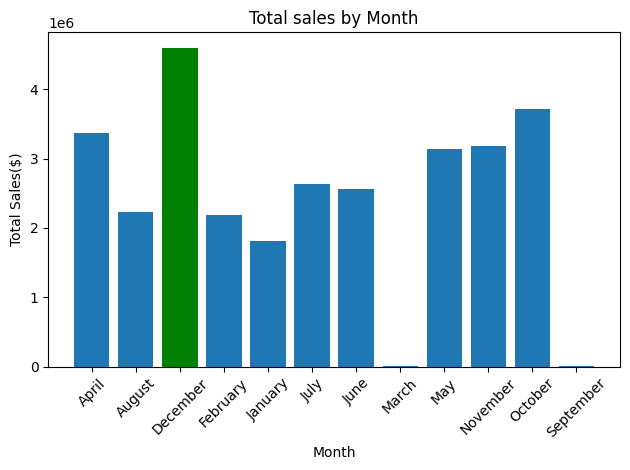

In [290]:
#What was the best month for sales? How much was earned that month?
months = monthly_sales['Month']
sales = monthly_sales['Total Sales']

plt.bar(months, sales)

plt.title('Total sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales($)')

best_month = sales.idxmax()
plt.bar(months[best_month],sales[best_month], color='green')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

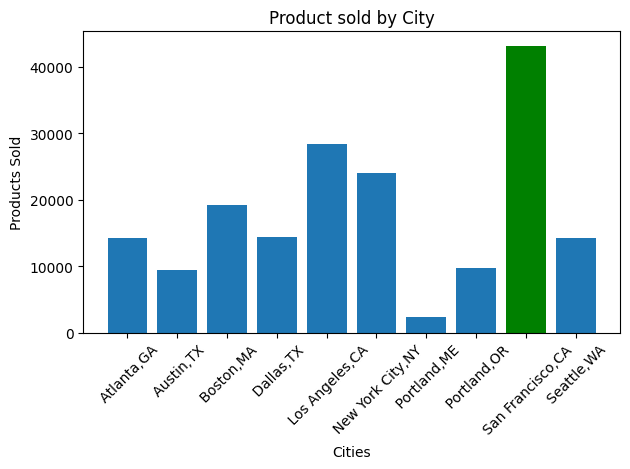

In [291]:
#What city sold the most product? 
cities = city_sales['City']
product_sold = city_sales['Quantity Ordered']

plt.bar(cities, product_sold)

plt.title('Product sold by City')
plt.xlabel('Cities')
plt.ylabel('Products Sold')

best_city = product_sold.idxmax()
plt.bar(cities[best_city], product_sold[best_city], color='Green')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

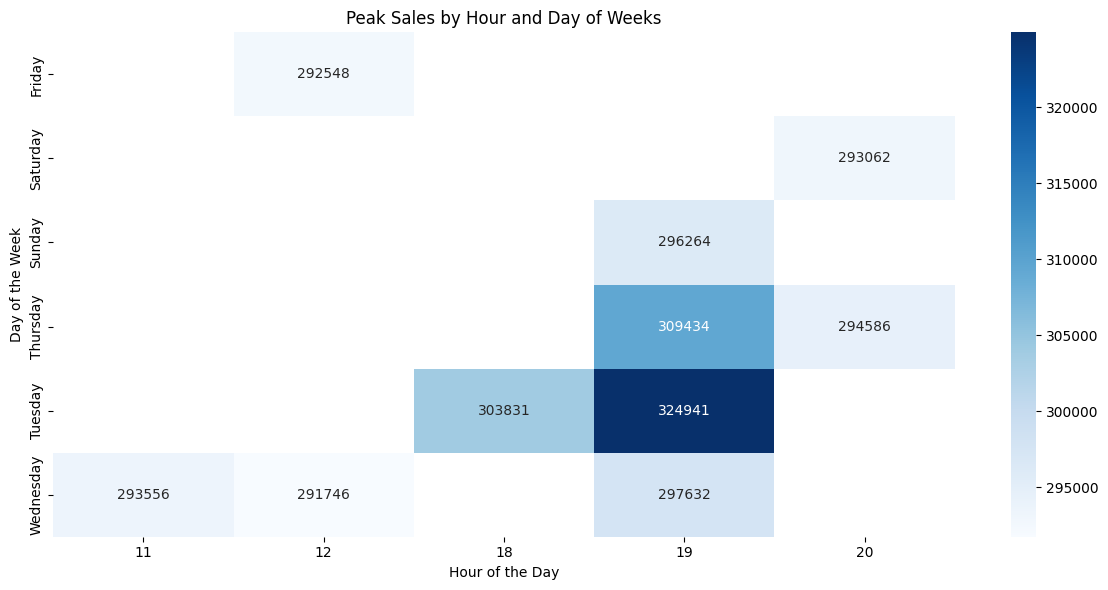

In [292]:
#What time should we display advertisemens to maximize the likelihood of customer’s buying product?
import seaborn as sns

heatmap_data = peak_time.pivot_table(index='Day of Week', columns='Hour', values='Total Sales', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.0f')

plt.title('Peak Sales by Hour and Day of Weeks')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()

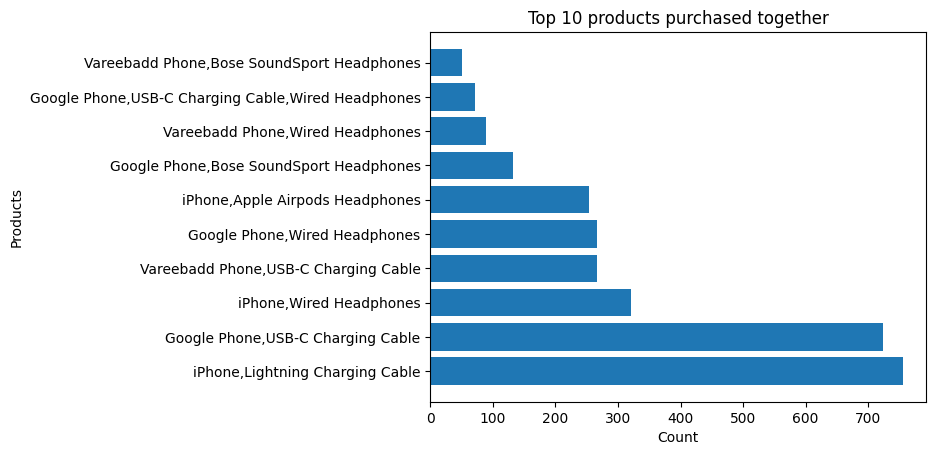

In [293]:
#What products are most often sold together?
plt.barh(duplicated_data['Grouped'], duplicated_data['Count'])

plt.title('Top 10 products purchased together')
plt.xlabel('Count')
plt.ylabel('Products')

plt.show()

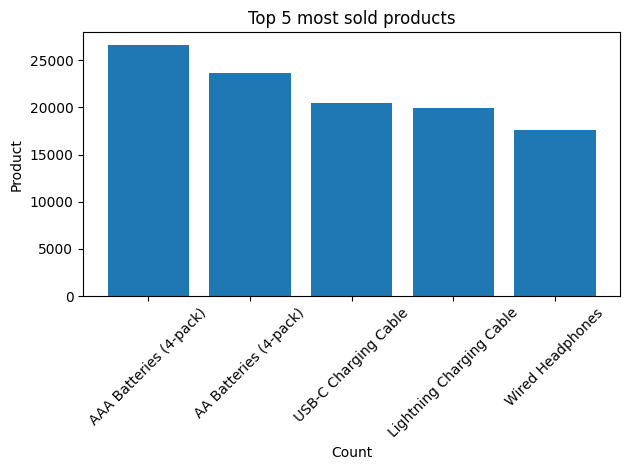

In [294]:
#What product sold the most? Why do you think it sold the most?
plt.bar(most_sold['Product'],most_sold['Count'])

plt.title('Top 5 most sold products')
plt.xlabel('Count')
plt.ylabel('Product')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()